X shape: (757, 200, 3)
y shape: (757,)
Unique labels: ['normal' 'udrykning']
Train: (605, 200, 3)
Test : (152, 200, 3)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 196, 16)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 192, 32)        │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 96, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 94, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,497 (25.38 KB)

 Trainable params: 6,497 (25.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6612 - loss: 0.6711 - val_accuracy: 0.7303 - val_loss: 0.6383
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7074 - loss: 0.6299 - val_accuracy: 0.7171 - val_loss: 0.5852
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7025 - loss: 0.6029 - val_accuracy: 0.7237 - val_loss: 0.5667
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7157 - loss: 0.5840 - val_accuracy: 0.7434 - val_loss: 0.5437
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7388 - loss: 0.5554 - val_accuracy: 0.7566 - val_loss: 0.5350
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7587 - loss: 0.5292 - val_accuracy: 0.7763 - val_loss: 0.5158
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7455 - loss: 0.5151 - val_accuracy: 0.7829 - val_loss: 0.5056
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7603 - loss: 0.5079 - val_accuracy: 0.7566 - val_lo

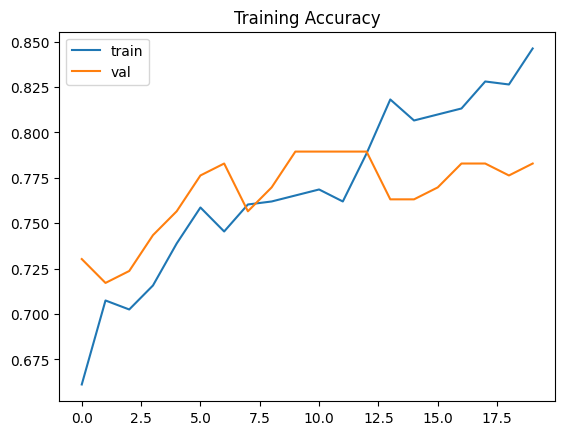

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


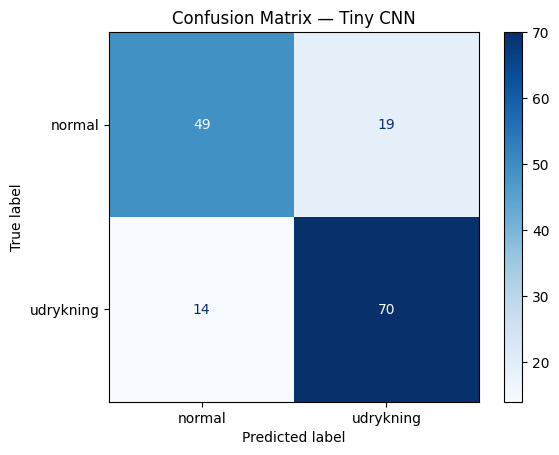

In [9]:
# ============================================================
# TINY 1D-CNN TIL ACCELEROMETER DATA — TRAINING ON PC
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models

# ------------------------------------------------------------
# STEP 1 — Load data
# ------------------------------------------------------------
X = np.load("X_windows.npy")   # forventer shape (N, 200, 3)
y = np.load("y_labels.npy")

# Normalisering — MEGET vigtigt for CNN!
X = X.astype(np.float32)

# Global normalisering (std-skalering)
X_mean = X.mean(axis=(0,1), keepdims=True)
X_std  = X.std(axis=(0,1), keepdims=True)
X = (X - X_mean) / (X_std + 1e-8)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", np.unique(y))

# Encode labels til 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


# ------------------------------------------------------------
# STEP 2 — Tiny 1D-CNN model (uden warnings)
# ------------------------------------------------------------

model = models.Sequential([
    layers.Input(shape=(X.shape[1], X.shape[2])),

    layers.Conv1D(16, kernel_size=5, activation='relu'),
    layers.Conv1D(32, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),

    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


# ------------------------------------------------------------
# STEP 3 — Train model
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

# ------------------------------------------------------------
# STEP 4 — Evaluate
# ------------------------------------------------------------
loss, acc = model.evaluate(X_test, y_test)
print("\nTEST ACCURACY:", acc)

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Training Accuracy")
plt.show()

# ------------------------------------------------------------
# STEP 5 — Confusion Matrix
# ------------------------------------------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=le.classes_,
    cmap="Blues"
)
plt.title("Confusion Matrix — Tiny CNN")
plt.show()

In [8]:
import collections
print(collections.Counter(y))

Counter({np.str_('udrykning'): 420, np.str_('normal'): 337})
